# Limpieza de Datos

### Librerías Utilizadas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importamos los datos

La base de datos cuenta con 205 registros y 21 variables.

In [3]:
df = pd.read_csv('precios_autos-2.csv')
df.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0


### Análisis Exploratorio

Antes de comenzar a limpiar los datos, se debe hacer un análisis exploratorio para conocer la base de datos y sus valores para así poder detectar anomalías y relaciones en las variables.

#### Estadística descriptiva

Como primer análisis se hará una estadística descriptiva, con la cual se observará de manera superficial los valores de las variables. Observando los datos obtenidos en la siguiente tabla, se encuentran valores que tienen lógica con el contexto que se conoce hasta el momento. La única variable que debería ser categórica según el Diccionario es la variable 'symboling', por lo que se deberá transformar el tipo de dato a objeto para que se pueda manipular de la manera correcta.

In [4]:
df['symboling'] = df['symboling'].astype('object')

In [5]:
df.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


A continuación se muestra los datos descriptivos de las variables categóricas del archivo. Para este, se buscará encontrar los valores con mayor frecuencia de cada variable, cuántos valores únicos tienen y finalmente la frecuencia de los valores que cada variable contiene.

In [6]:
df.describe(include='object')

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber
count,205,205,205,205,205,205,205,205
unique,6,147,2,5,3,2,7,7
top,0,toyota corona,gas,sedan,fwd,front,ohc,four
freq,67,6,185,96,120,202,148,159


symboling
0     67
1     54
2     32
3     27
-1    22
-2     3
Name: count, dtype: int64

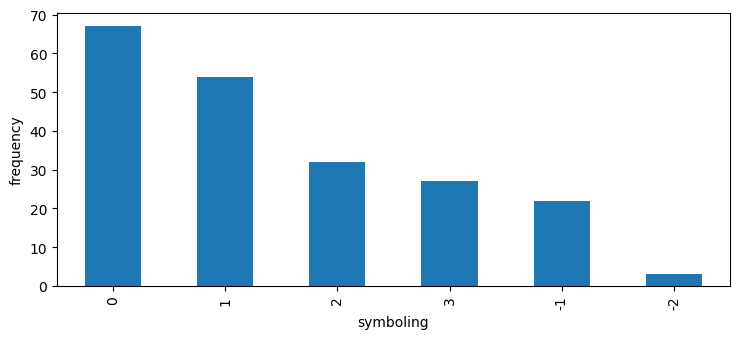

In [7]:
display(df['symboling'].value_counts())

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df['symboling'].value_counts().plot(ax=ax, kind='bar', xlabel='symboling', ylabel='frequency')
plt.show()


In [8]:
display(df['CarName'].value_counts())

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

fueltype
gas       185
diesel     20
Name: count, dtype: int64

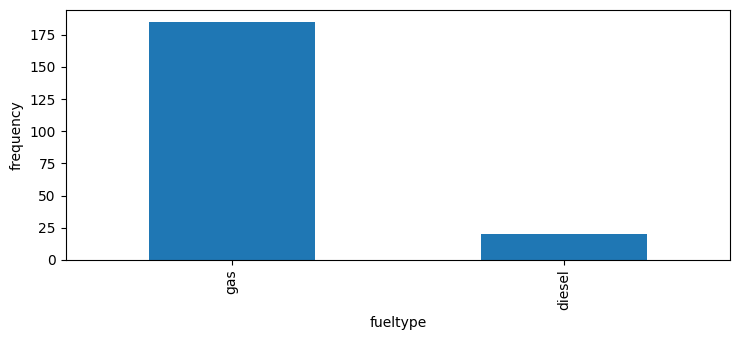

In [9]:
display(df['fueltype'].value_counts())
fig, ax = plt.subplots()

df['fueltype'].value_counts().plot(ax=ax, kind='bar', xlabel='fueltype', ylabel='frequency')
plt.show()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

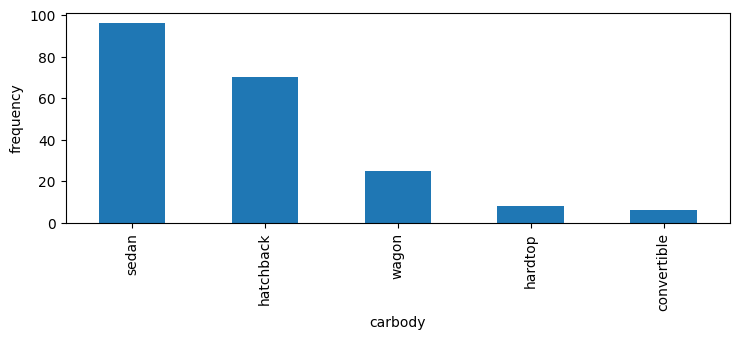

In [10]:
display(df['carbody'].value_counts())
fig, ax = plt.subplots()

df['carbody'].value_counts().plot(ax=ax, kind='bar', xlabel='carbody', ylabel='frequency')
plt.show()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

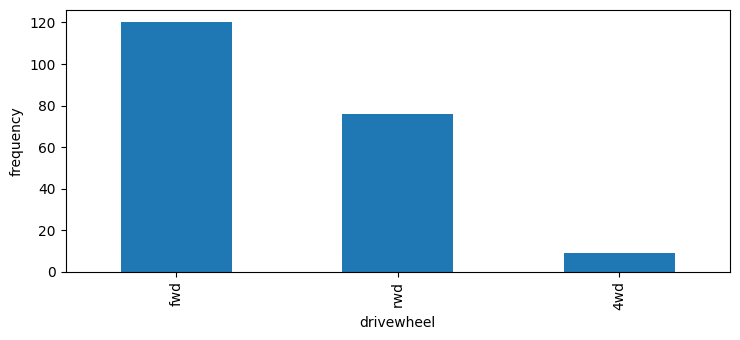

In [11]:
display(df['drivewheel'].value_counts())
fig, ax = plt.subplots()

df['drivewheel'].value_counts().plot(ax=ax, kind='bar', xlabel='drivewheel', ylabel='frequency')
plt.show()

enginelocation
front    202
rear       3
Name: count, dtype: int64

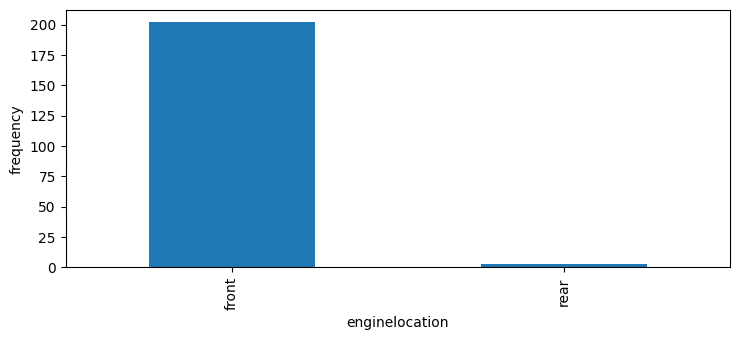

In [12]:
display(df['enginelocation'].value_counts())
fig, ax = plt.subplots()

df['enginelocation'].value_counts().plot(ax=ax, kind='bar', xlabel='enginelocation', ylabel='frequency')
plt.show()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

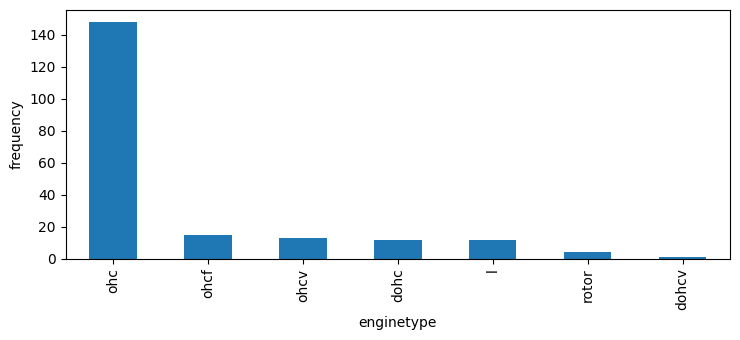

In [13]:
display(df['enginetype'].value_counts())
fig, ax = plt.subplots()

df['enginetype'].value_counts().plot(ax=ax, kind='bar', xlabel='enginetype', ylabel='frequency')
plt.show()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

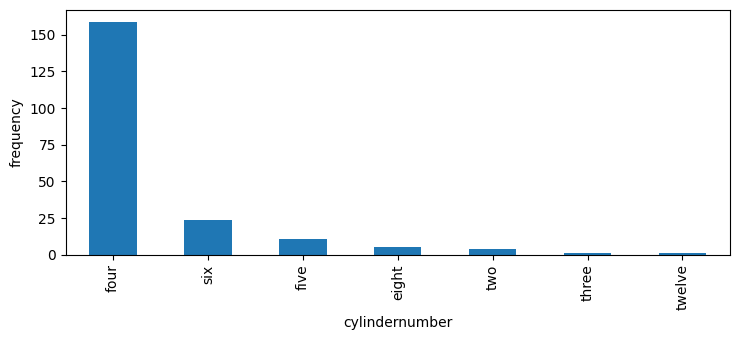

In [14]:
display(df['cylindernumber'].value_counts())
fig, ax = plt.subplots()

df['cylindernumber'].value_counts().plot(ax=ax, kind='bar', xlabel='cylindernumber', ylabel='frequency')
plt.show()

In [15]:
print(df.dtypes)

symboling            object
CarName              object
fueltype             object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


#### Datos Faltantes

Podemos observar en la siguiente tabla que todos los datos del archivo están completos, no hay ningún dato nulo.

In [16]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### Histogramas de variables cuantitativas

Para poder analizar datos y encontrar valores atípicos dentro de estos, se utilizarán gráficas de Boxplot para identificar cada uno de estos valores, analizarlos y posteriormente más adelante evaluar si se deben de mantener o eliminar de la base de datos.

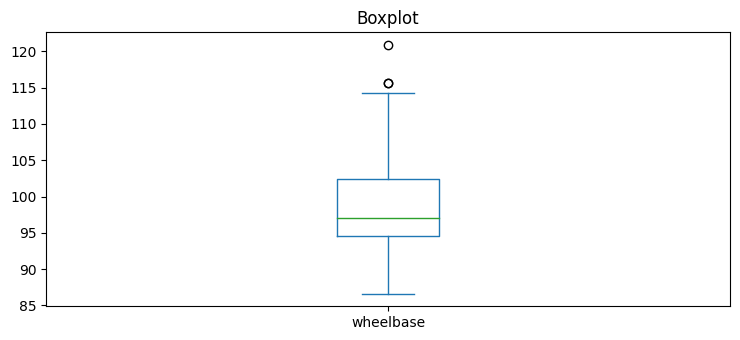

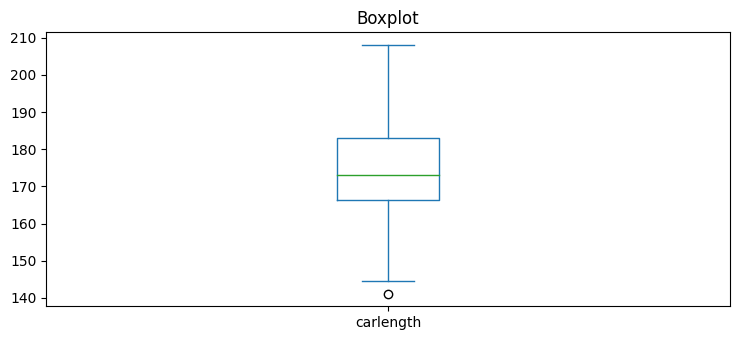

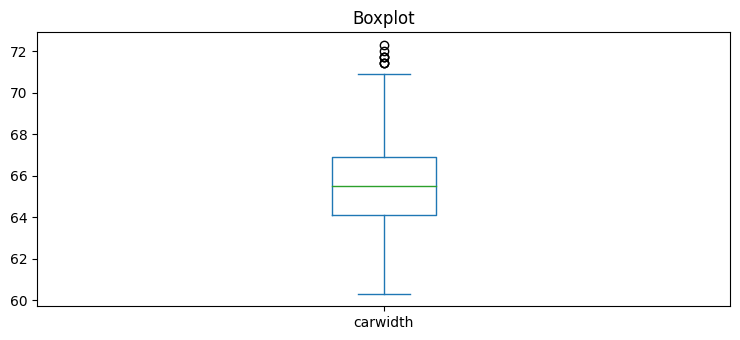

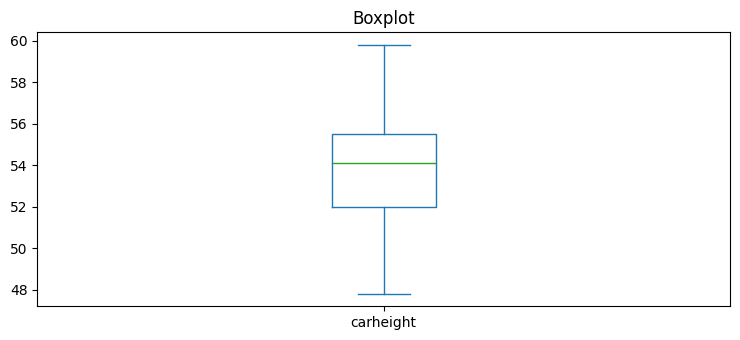

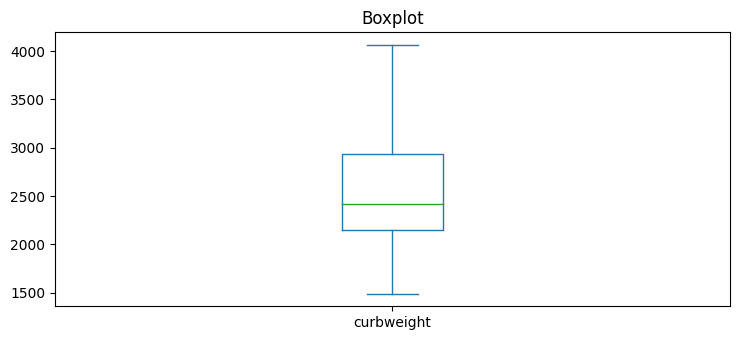

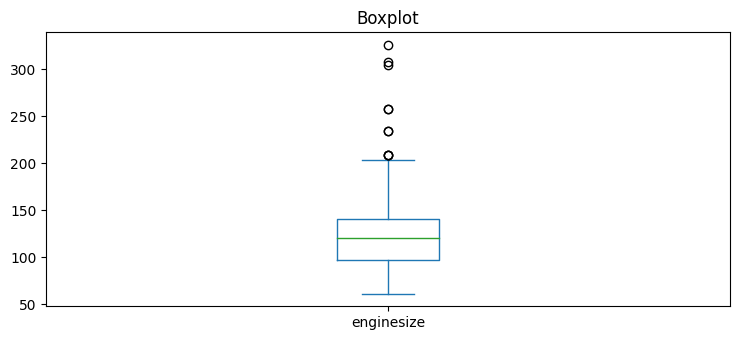

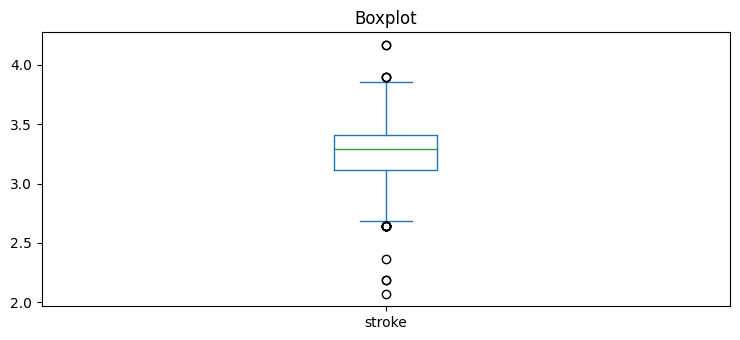

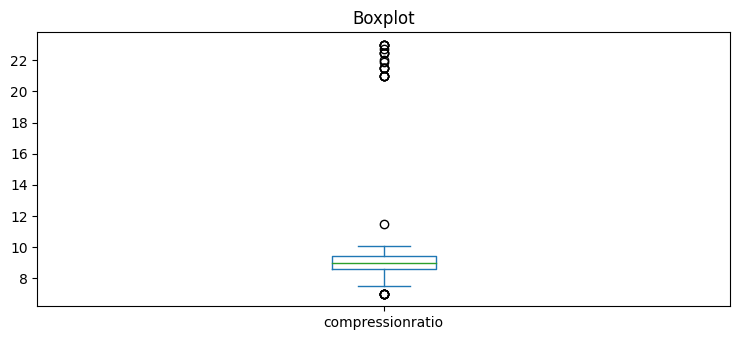

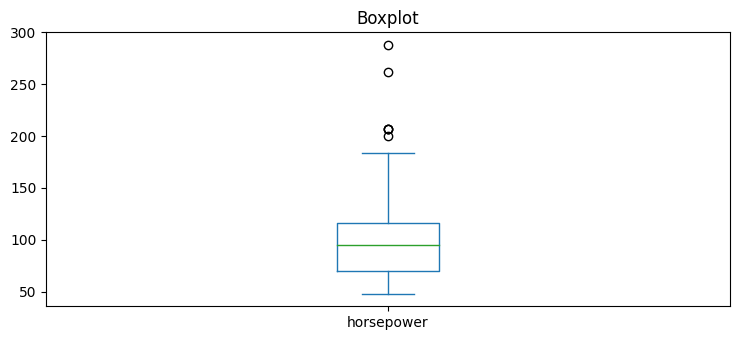

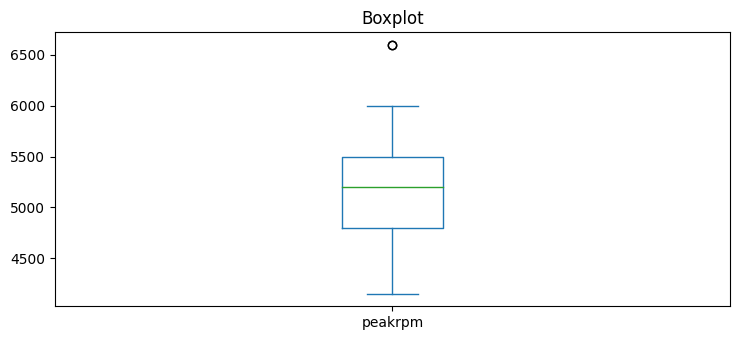

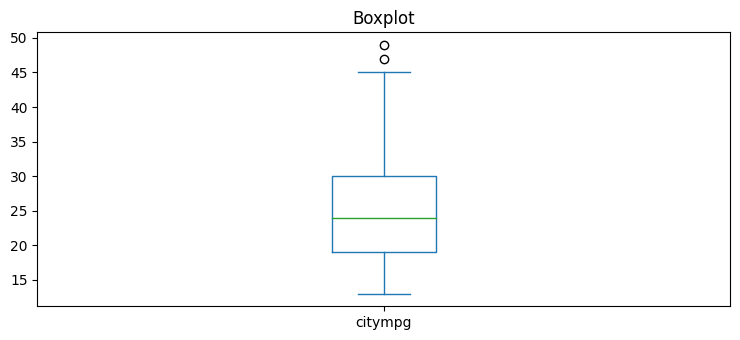

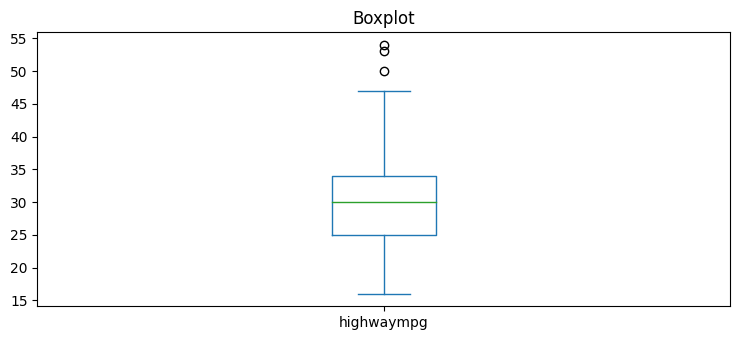

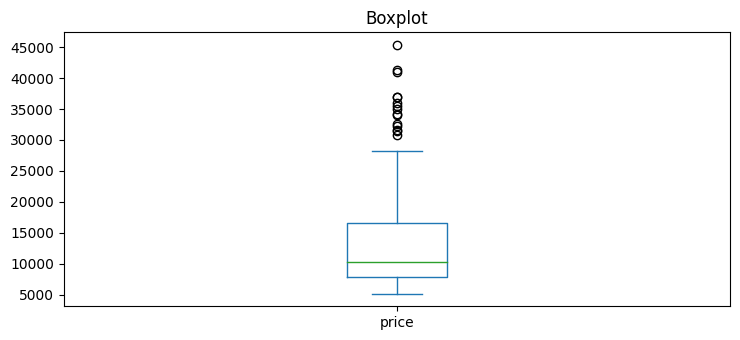

In [17]:
lista = list(df.columns)
categoricos = ['symboling', 'CarName', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']
for columna in categoricos:
    lista.remove(columna)

for col in lista:
    ax = df[col].plot(kind='box', title='Boxplot')
    plt.show()


Observando los Boxplots anteriores, encontramos que múltiples variables tienen valores atípicos, los cuales están siendo representados como círculos fuera de los gráficos como tal. Más delante se mostrarán los datos específicos de estos y se manejarán debidamente a su caso.

#### Análisis de distribución de los datos cuantitativos

Para continuar con nuestra exploración de datos, ahora se observará cómo los datos de cada una de las variables cuantitativas se comportan al graficarlas en un histograma. Esto con la intención de encontrar si se distribuyen de manera simétrica o asimétrica.

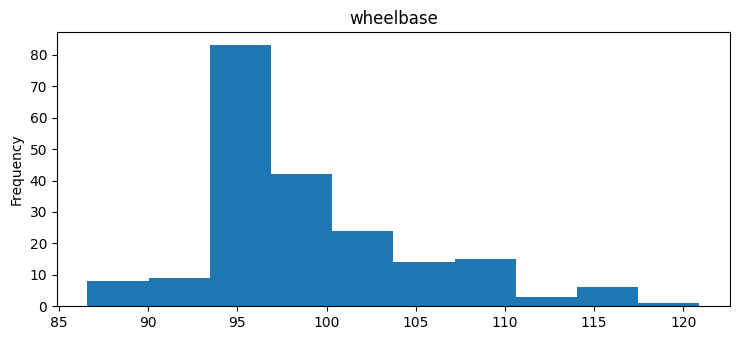

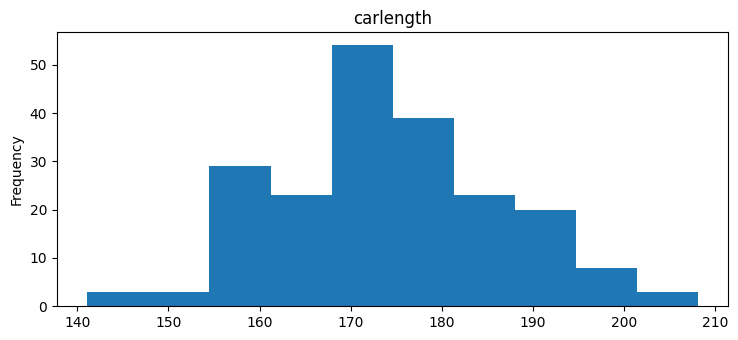

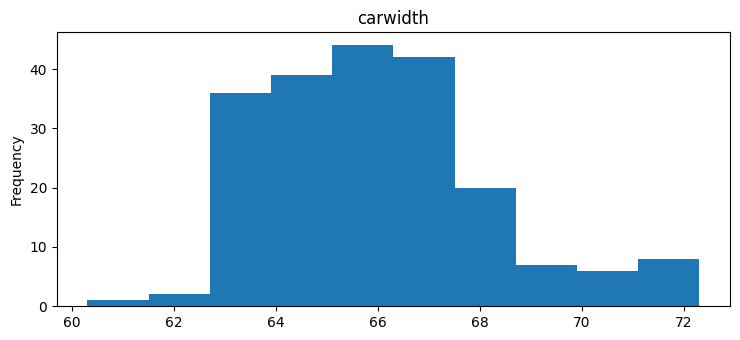

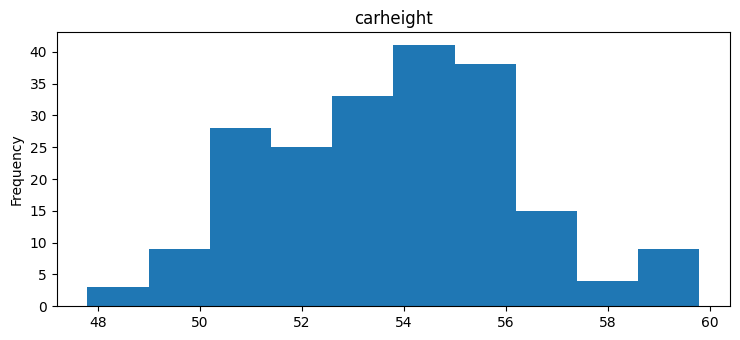

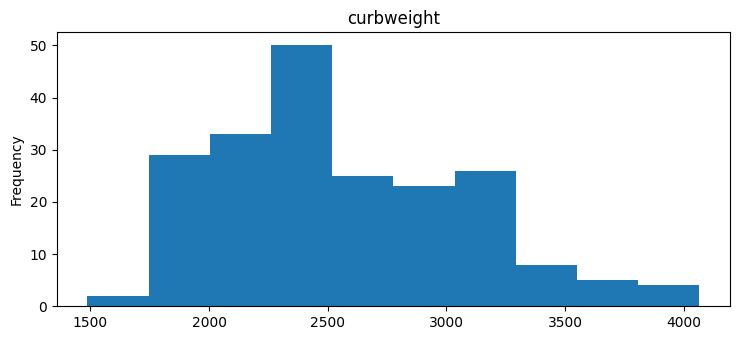

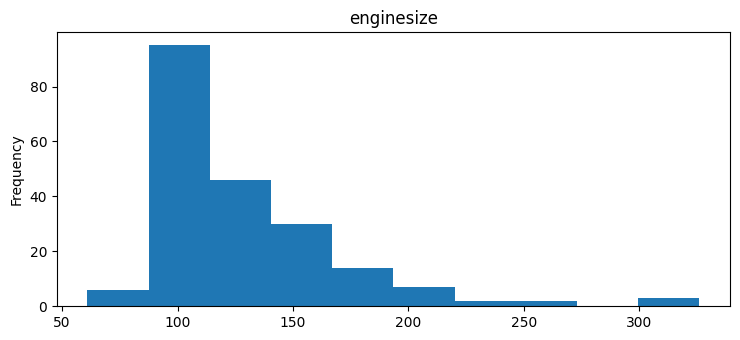

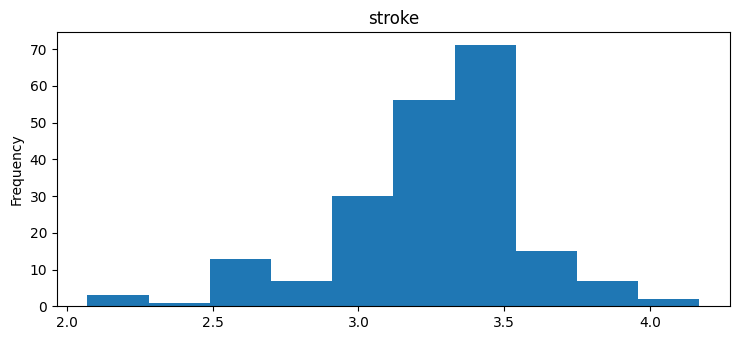

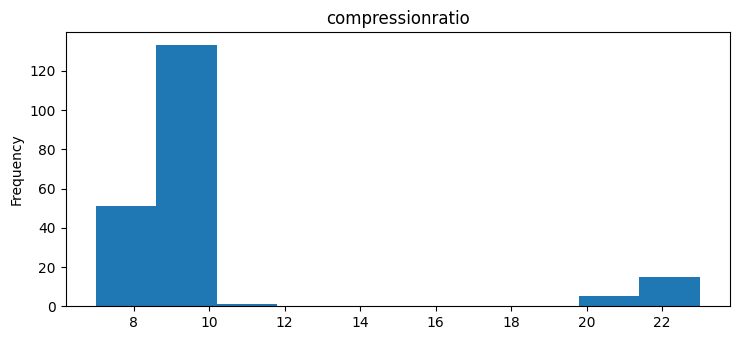

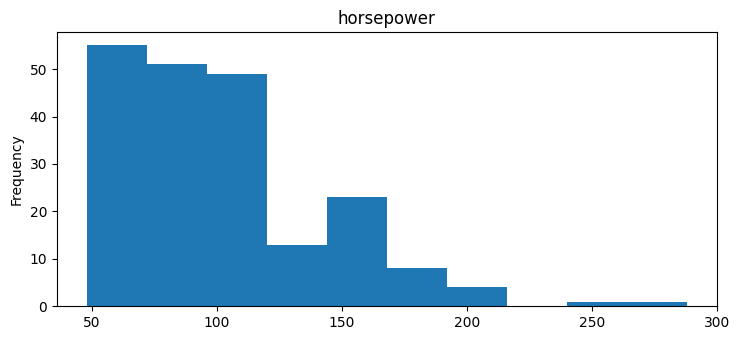

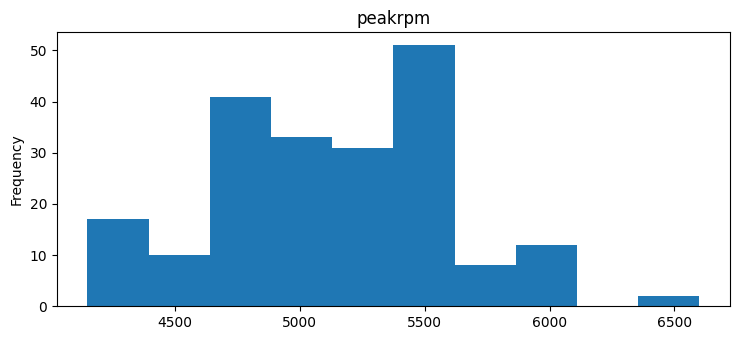

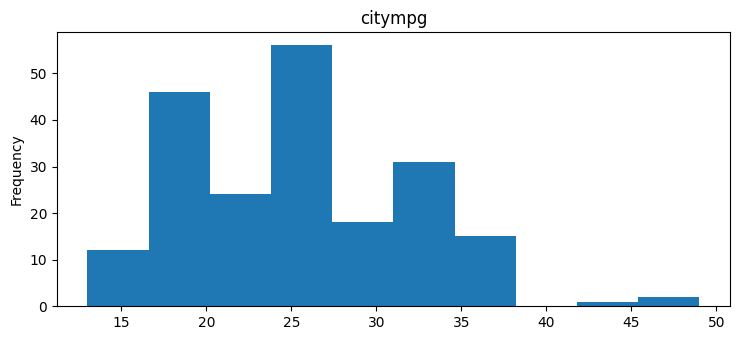

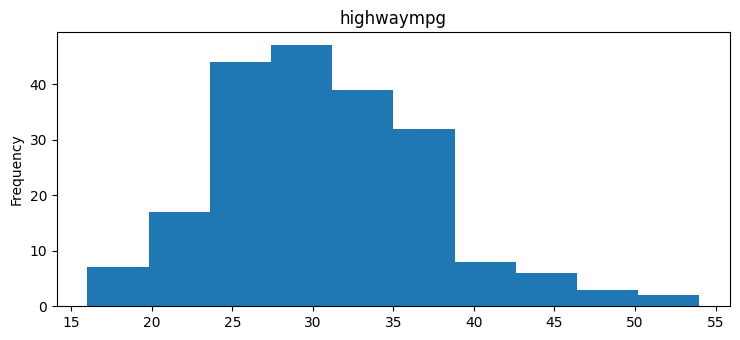

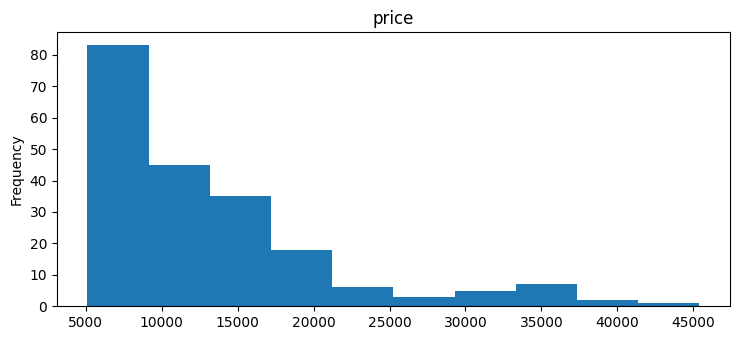

In [18]:
for col in lista:
    ax = df[col].plot(kind='hist', title=col)
    plt.show()


Observando los histogramas anteriores, podemos visualizar que las únicas variables que pudieran ser consideradas simétricas son 'carlength', 'carheight', 'peakrpm' y 'citympg'. Sabemos que sin tratar los datos, las gráficas no van a tener un comportamiento simétrico o asimétrico evidente, sino que se tienen que tratar los datos para poder observar con mayor claridad el verdadero comportamiento de estos y ya poder concluir si son asimétricas o simétricas.

#### Análisis de Colinealidad

Para analizar la colinealidad de los datos, se hará una matriz de correlación al igual que un diagrama de dispersión para las variables.

In [19]:
cuantitativo = df.drop(['symboling', 'CarName', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber'], axis=1)
cuantitativo.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.40,8.0,115,5500,18,22,17450.0


<Axes: >

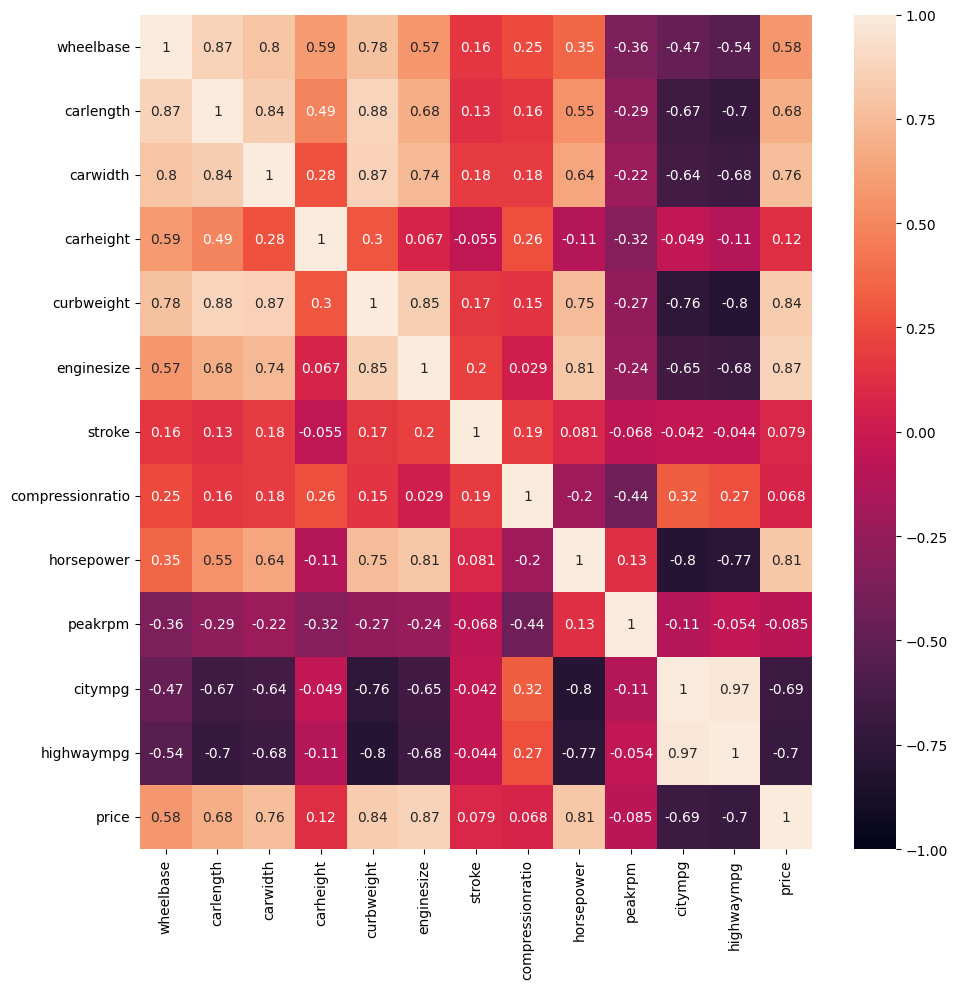

In [20]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
sns.heatmap(cuantitativo.corr(), vmin=-1, vmax=1, annot=True)

In [21]:
import plotly.express as px

fig = px.scatter_matrix(cuantitativo, width=1300, height=1500)
fig.update_layout({"xaxis"+str(i+1): dict(tickangle = -90) for i in range(13)})
fig.update_traces(diagonal_visible=False)
fig.show()

Una vez viendo los gráficos, encontramos que hay algunos valores que tienen alta correlación lineal entre sí. Estos valores son los que tienen un valor absoluto mayor o igual a 0.60:

- Car length/ Wheel base/ .87
- Car width/ wheel base/ .8
- Curbweight/ wheel base/ .78
- Car width/ car length/ .84
- curbweight/ car length/ .88
- Engine size/ car length/ .68
- City mpg/ car length/ -.67
- Highway mpg/ car length/ -.7
- Price/ car length/ .68
- Curbweight/ car width/ .87
- Engine size/ car width/ .74
- Horse power/ car width/ .64
- City mpg/ car width/ -.64
- Highway mpg/ car width/ -.68
- Price/ car width/ .76
- Engine size/ curbweight/ .85
- Horsepower/ curbweight/ .75
- City mpg/ curbweight/ -.76 
- Highway mpg/ curbweight/ -.8
- Price/ curbweight/ .84
- Horsepower/ engine size/ .81 
- City mpg/ engine size/ -.65
- Highway mpg/ engine size/ -.68 
- Price/ engine size/ .87
- City mpg/ horsepower/ -.8
- Highway mpg/ horsepower/-.77
- Price/ horsepower/ .81
- Highway mpg/ city mpg/ .97 
- Price/ city mpg/ -.69
- Price/ Highway mpg/ -.7

#### Distribución de los datos cualitativos

Anteriormente en la sección de Estadística Descriptiva se mostraron gráficos de barra con las frecuencias de los datos cualitativos. Ahora se mostrarán gráficos de pastel para podeer visualziar la distribución de las frecuencias de una manera más simple.

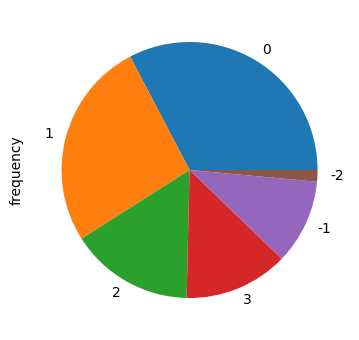

In [22]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

df['symboling'].value_counts().plot.pie(ax=ax, xlabel='symboling', ylabel='frequency')
plt.show()


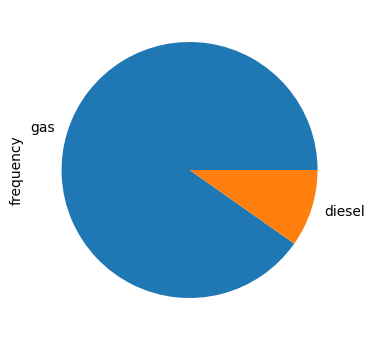

In [23]:
fig, ax = plt.subplots()

df['fueltype'].value_counts().plot(ax=ax, kind='pie', xlabel='fueltype', ylabel='frequency')
plt.show()

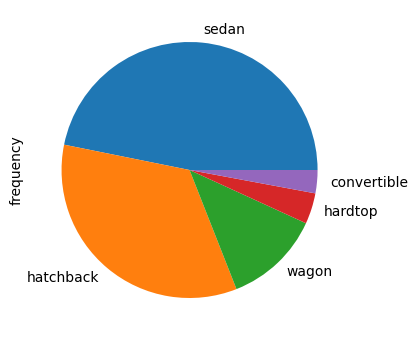

In [24]:
fig, ax = plt.subplots()

df['carbody'].value_counts().plot(ax=ax, kind='pie', xlabel='carbody', ylabel='frequency')
plt.show()

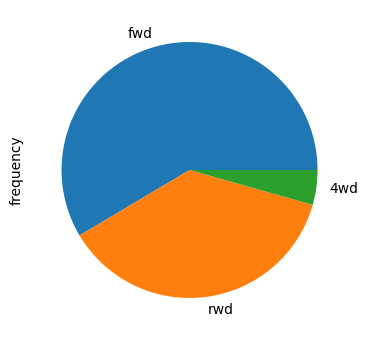

In [25]:
fig, ax = plt.subplots()

df['drivewheel'].value_counts().plot(ax=ax, kind='pie', xlabel='drivewheel', ylabel='frequency')
plt.show()

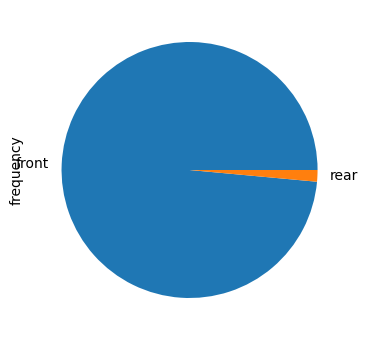

In [26]:
fig, ax = plt.subplots()

df['enginelocation'].value_counts().plot(ax=ax, kind='pie', xlabel='enginelocation', ylabel='frequency')
plt.show()

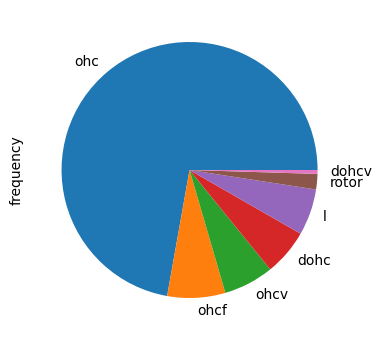

In [27]:
fig, ax = plt.subplots()

df['enginetype'].value_counts().plot(ax=ax, kind='pie', xlabel='enginetype', ylabel='frequency')
plt.show()

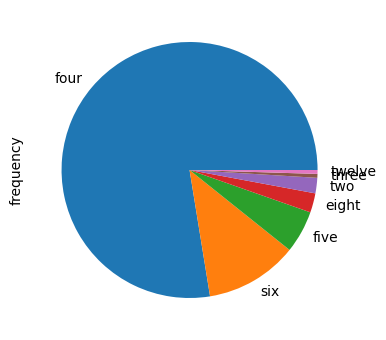

In [28]:
fig, ax = plt.subplots()

df['cylindernumber'].value_counts().plot(ax=ax, kind='pie', xlabel='cylindernumber', ylabel='frequency')
plt.show()

#### Analiza asociación o colinealidad

Ahora se mostrarán diagramas de caja y bigote para cada una de las categorias dentro de cada variable comparada con los precios con excepción de CarName

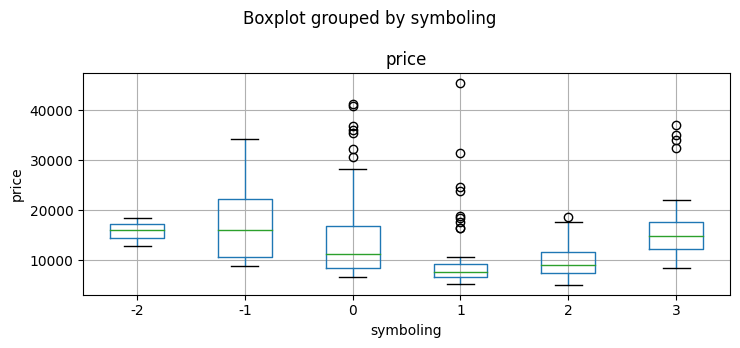

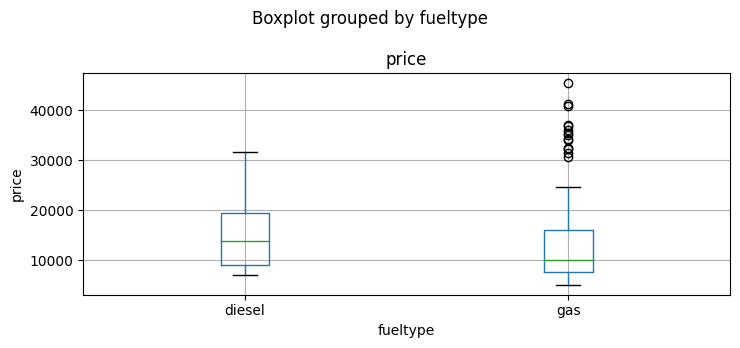

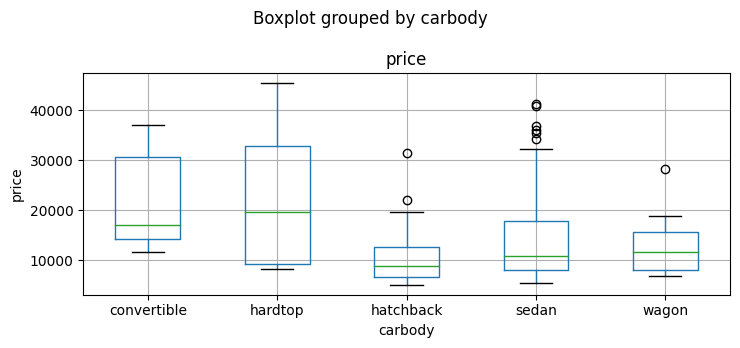

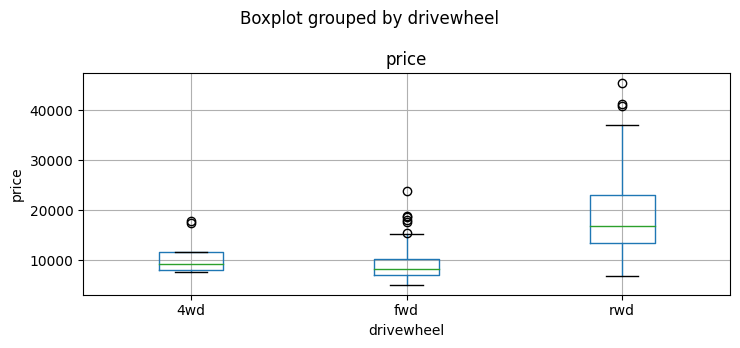

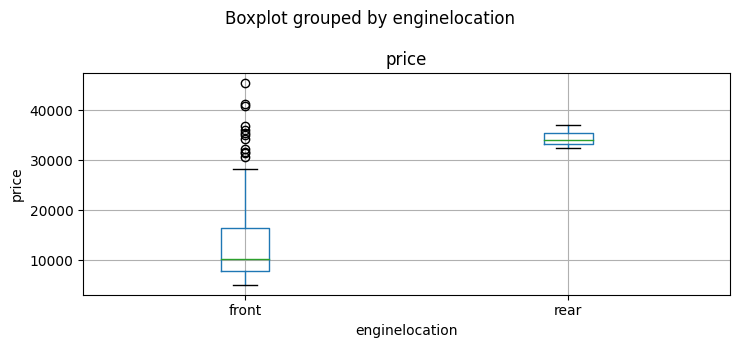

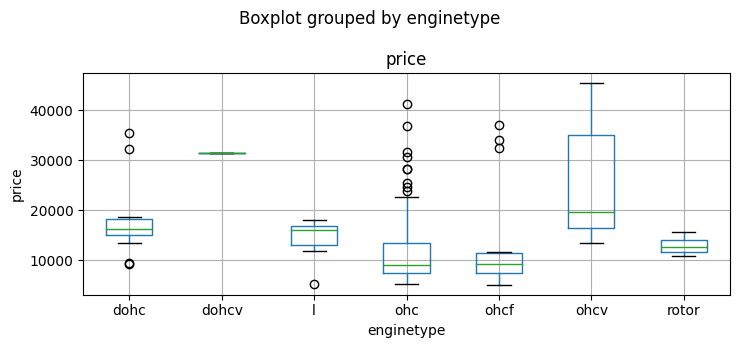

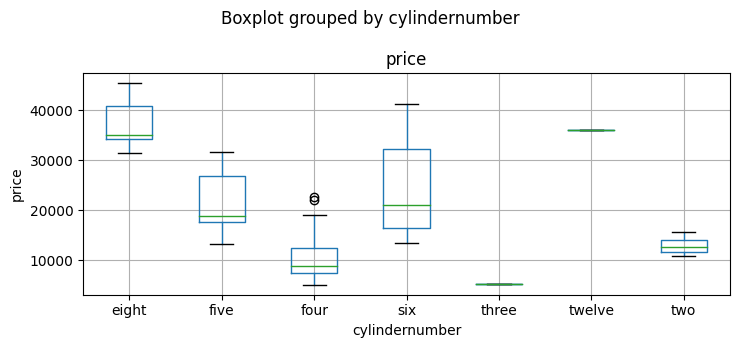

In [29]:
categoria = ['symboling', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber']

for col in categoria:
    fig, ax = plt.subplots()
    df.boxplot(column='price', by=col, ax=ax)
    plt.xlabel(col)
    plt.ylabel('price')
plt.show()

#### Variables a elegir para análisis de las características de los automóviles que determinan su precio

Las variables elegidas para hacer el análisis de características son:

- carwidth
- wheelbase
- enginesize
- horsepower
- citympg
- peakrpm

Una vez elegidas, se hará un nuevo dataframe en donde se incorporarán las variables elegidas al igual que la variable 'price' apra poder hacer un análisis sobre esta en futuras entregas.

In [30]:
datos = df.drop(['symboling','CarName','fueltype', 'carbody', 'compressionratio', 'drivewheel','enginelocation', 'cylindernumber','stroke','curbweight','enginetype','carheight','carlength','highwaympg'], axis=1)
datos.head()

,wheelbase,carwidth,enginesize,horsepower,peakrpm,citympg,price
0,88.6,64.1,130,111,5000,21,13495.0
1,88.6,64.1,130,111,5000,21,16500.0
2,94.5,65.5,152,154,5000,19,16500.0
3,99.8,66.2,109,102,5500,24,13950.0
4,99.4,66.4,136,115,5500,18,17450.0


Teniendo el nuevo dataframe, es momento de observar los datos atípicos de las variables. Primeramente, carweight cuenta con ocho outliers, 3 audis, 4 buick y un porsche. 

In [32]:
datos.describe()

,wheelbase,carwidth,enginesize,horsepower,peakrpm,citympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,65.907805,126.907317,104.117073,5125.121951,25.219512,13276.710571
std,6.021776,2.145204,41.642693,39.544167,476.985643,6.542142,7988.852332
min,86.600000,60.300000,61.000000,48.000000,4150.000000,13.000000,5118.000000
25%,94.500000,64.100000,97.000000,70.000000,4800.000000,19.000000,7788.000000
50%,97.000000,65.500000,120.000000,95.000000,5200.000000,24.000000,10295.000000
75%,102.400000,66.900000,141.000000,116.000000,5500.000000,30.000000,16503.000000
max,120.900000,72.300000,326.000000,288.000000,6600.000000,49.000000,45400.000000


In [34]:
outliers = df.loc[(datos['carwidth'] > (66.9+1.5*(66.9-64.1)))]
print('Outliers de carwidth: ')
outliers['CarName']

Outliers de carwidth: 


6                           audi 100ls
7                            audi 5000
8                            audi 4000
70                       buick skyhawk
71             buick opel isuzu deluxe
73               buick century special
74     buick regal sport coupe (turbo)
129                    porsche cayenne
Name: CarName, dtype: object

Así como el proceso anterior, se hará lo mismo para todos los outliers que se encuentren y se tomará la decisión de mantenerlos/eliminarlos en futuras entregas dependiendo si afectan o no al modelo que se esté implementando.

In [35]:
outliers = df.loc[(datos['wheelbase'] > (102.4+1.5*(102.4-94.5)))]
print('Outliers de wheelbase: ')
outliers['CarName']

Outliers de wheelbase: 


70              buick skyhawk
71    buick opel isuzu deluxe
73      buick century special
Name: CarName, dtype: object

Wheelbase tiene tres outliers: todos son buicks.

In [ ]:
outliers = df.loc[(datos['enginesize'] > (141+1.5*(141-97)))]
print('Outliers de enginesize: ')
outliers['CarName']

Outliers de enginesize: 


15                             bmw x4
16                             bmw x5
17                             bmw x3
47                          jaguar xj
48                          jaguar xf
49                          jaguar xk
71            buick opel isuzu deluxe
72                      buick skylark
73              buick century special
74    buick regal sport coupe (turbo)
Name: CarName, dtype: object

Enginesize cuenta con 10 outliers: 3 bmw's, 3 jaguares y 4 buicks.

In [ ]:
outliers = df.loc[(datos['horsepower'] > (116+1.5*(116-70)))]
print('Outliers de horsepower: ')
outliers['CarName']

Outliers de horsepower: 


49             jaguar xk
105         nissan kicks
126    porcshce panamera
127      porsche cayenne
128       porsche boxter
129      porsche cayenne
Name: CarName, dtype: object

Horsepower tiene 6 outliers: un jaguar, un nissan, 4 porsches.

In [ ]:
outliers = df.loc[(datos['citympg'] > (30+1.5*(30-19)))]
print('Outliers de citympg: ')
outliers['CarName']

Outliers de citympg: 


18    chevrolet impala
30         honda civic
Name: CarName, dtype: object

Citympg tiene 2 outliers: un honda y un chevrolet.

In [36]:
outliers = df.loc[(datos['peakrpm'] > (5500+1.5*(5500-4800)))]
print('Outliers de peakrpm: ')
outliers['CarName']

Outliers de peakrpm: 


165    toyota celica gt liftback
166        toyota corolla tercel
Name: CarName, dtype: object

Por último, peakrpm tiene 2 outliers: dos toyotas.

#### Conclusiones

Gracias al extenso análisis hecho anteriormente, he podido comprender los datos dentro del archivo y cómo se comportan. Sin embargo, a falta de elegir un modelo para predecir los precios de los autos, aún no puedo tomar la decisión sobre si es conveniente normalizar los datos, eliminar ciertos outliers, discertizar o escalar los demás datos. Sin embargo, se sabe que para poder hacer de un modelo más eficiente en cuanto a poder computacional es conveniente normalizar los datos o inclusive suavizarlos para eliminar el ruido que generan datos atípicos, por lo que una vez que se elija el modelo eso será lo primero que se analizará y se hará a los datos que se elijieron anteriormente.